In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score

In [8]:
df = pd.read_csv("abalone.csv")
df.head()

Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7

In [9]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else -1 if x == 'F' else 0)
df.head()

Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0    1   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1    1   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   -1   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3    1   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4    0   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7

In [33]:
X = df.iloc[:, :8]
y = df.iloc[:, 8]

cv = KFold(n_splits=5, shuffle=True, random_state=1)
list_scores = []
list_index = []
for i in range(1, 51):
    model = RandomForestRegressor(n_estimators=i, random_state=1)
    model.fit(X, y)
    score = cross_val_score(model, X, y, scoring="r2", cv=cv).mean()
    list_scores.append(score)
    list_index.append(i)

In [85]:
df_scores = pd.DataFrame({"scores": list_scores, "n_estimators": list_index})
df_scores.head()

scores  n_estimators
0  0.109675             1
1  0.341300             2
2  0.406434             3
3  0.444775             4
4  0.465032             5

In [80]:
min_n_estimators = df_scores.sort_values(["n_estimators"], ascending=True)[df_scores["scores"] > 0.52]
min_n_estimators = min_n_estimators["n_estimators"].iloc[0]
print(min_n_estimators)

21


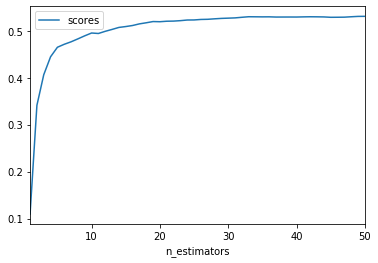

In [83]:
df_scores.plot(x="n_estimators", y="scores")
